c:\Users\sadan\OneDrive\Desktop\code\time_series_analysis\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


Evaluating random_walk data...


21:32:05 - cmdstanpy - INFO - Chain [1] start processing
21:32:05 - cmdstanpy - INFO - Chain [1] done processing


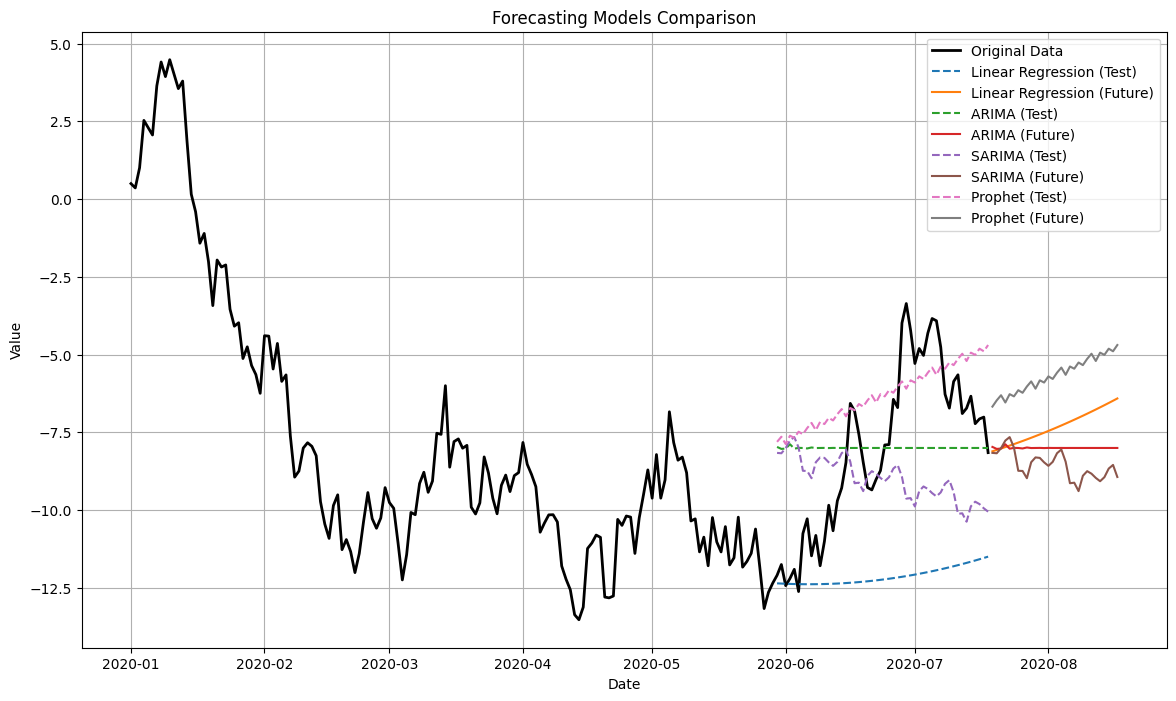

Evaluating trend data...


21:32:06 - cmdstanpy - INFO - Chain [1] start processing
21:32:06 - cmdstanpy - INFO - Chain [1] done processing


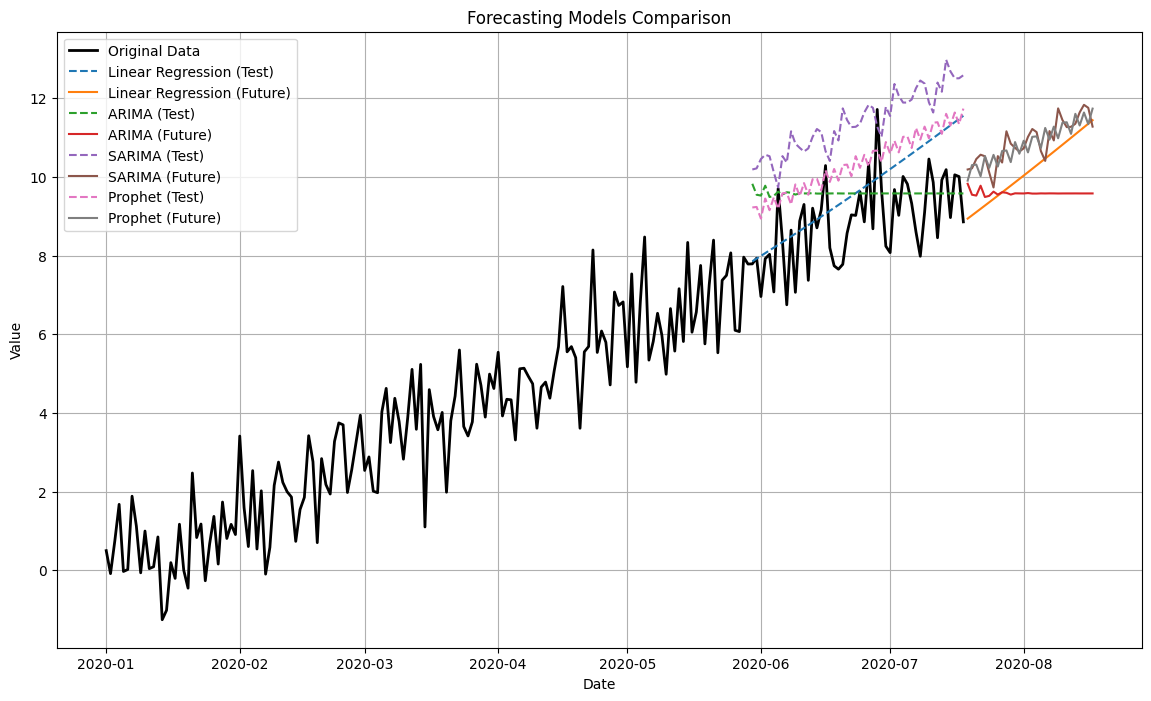

Evaluating seasonal data...


21:32:07 - cmdstanpy - INFO - Chain [1] start processing
21:32:07 - cmdstanpy - INFO - Chain [1] done processing


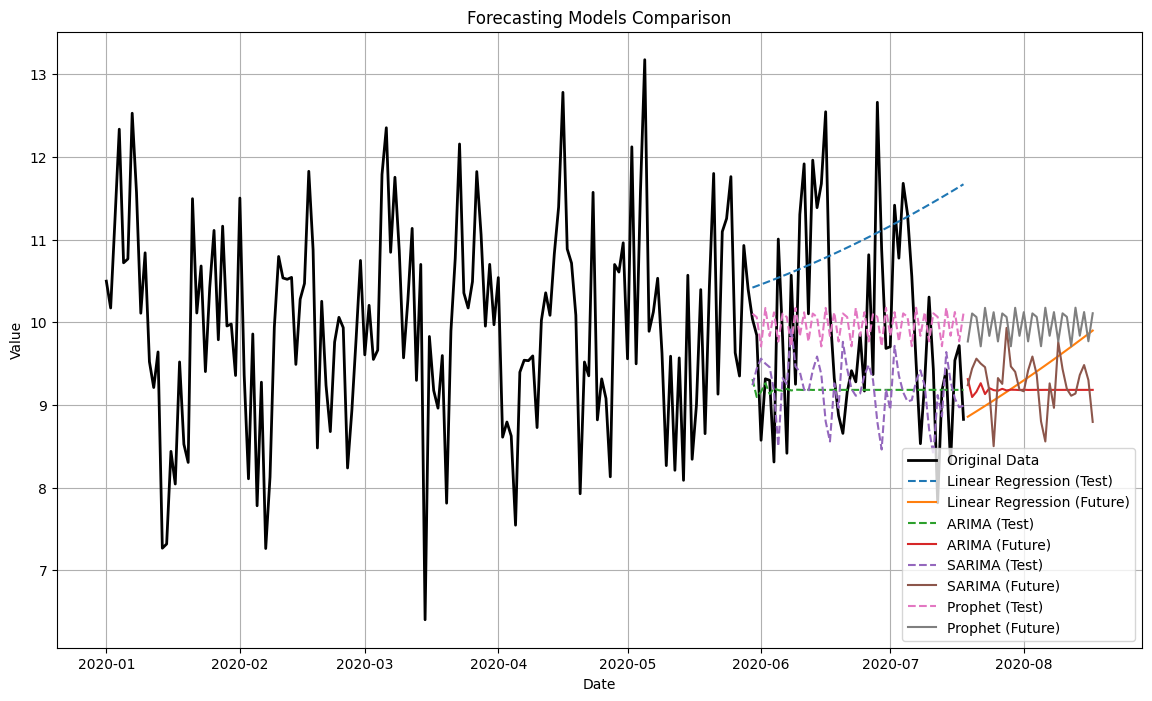

Evaluating white_noise data...


21:32:10 - cmdstanpy - INFO - Chain [1] start processing
21:32:10 - cmdstanpy - INFO - Chain [1] done processing


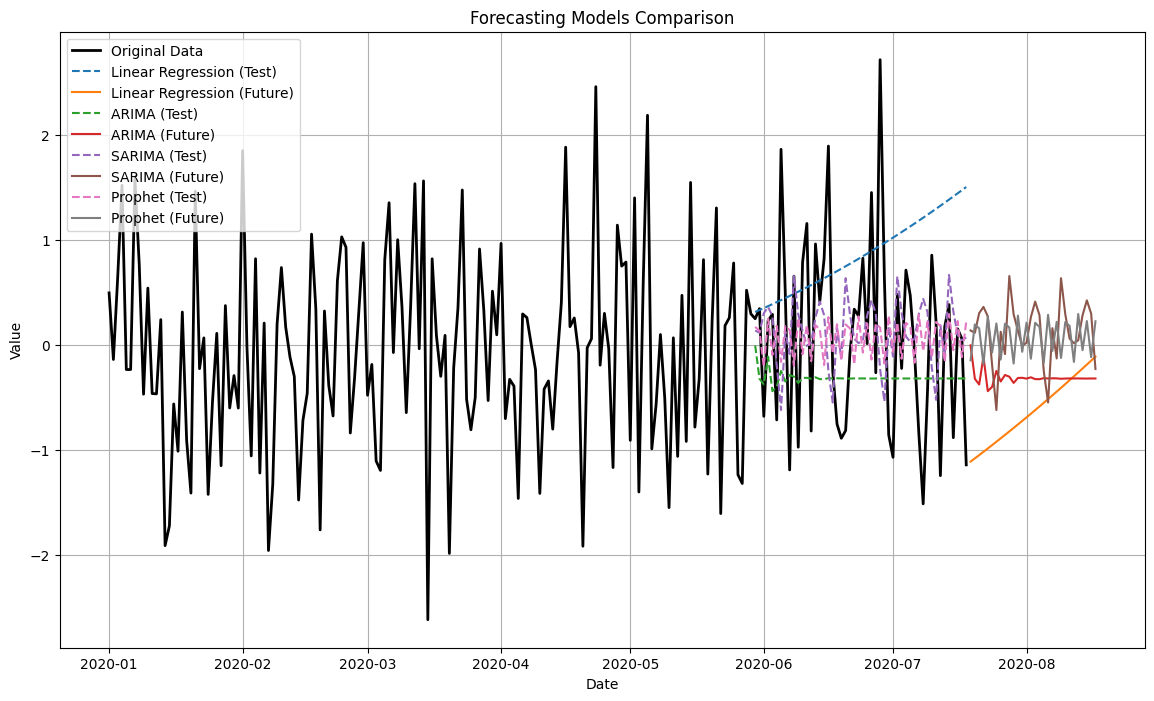

Results:

Data Type: random_walk
Linear Regression - MAE: 4.1552, RMSE: 4.8321
ARIMA - MAE: 2.2596, RMSE: 2.6426
SARIMA - MAE: 2.9017, RMSE: 3.3138
Prophet - MAE: 2.2414, RMSE: 2.6170

Data Type: trend
Linear Regression - MAE: 1.0599, RMSE: 1.2946
ARIMA - MAE: 1.0358, RMSE: 1.2753
SARIMA - MAE: 2.5625, RMSE: 2.7335
Prophet - MAE: 1.5624, RMSE: 1.7501

Data Type: seasonal
Linear Regression - MAE: 1.4042, RMSE: 1.6355
ARIMA - MAE: 1.0304, RMSE: 1.3916
SARIMA - MAE: 1.0964, RMSE: 1.4551
Prophet - MAE: 1.0076, RMSE: 1.1775

Data Type: white_noise
Linear Regression - MAE: 1.0423, RMSE: 1.2748
ARIMA - MAE: 0.7804, RMSE: 0.9649
SARIMA - MAE: 0.7679, RMSE: 0.9979
Prophet - MAE: 0.7219, RMSE: 0.9153
Evaluating random_walk data...


21:32:12 - cmdstanpy - INFO - Chain [1] start processing
21:32:12 - cmdstanpy - INFO - Chain [1] done processing


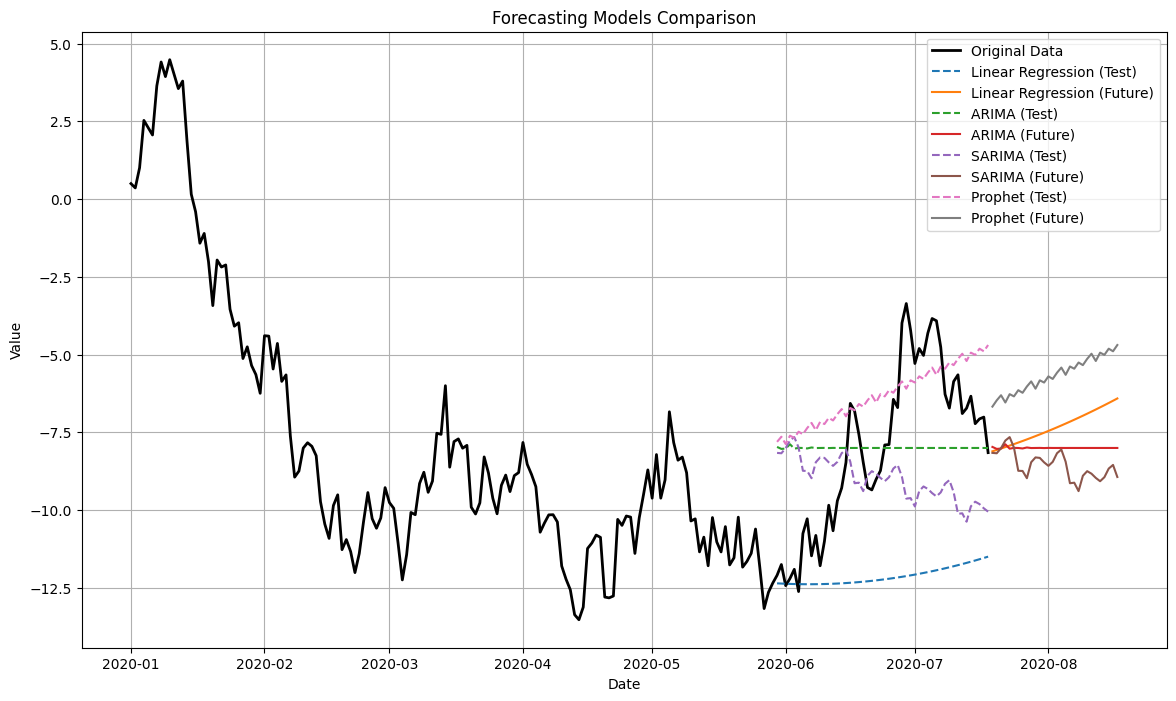

Evaluating trend data...


21:32:14 - cmdstanpy - INFO - Chain [1] start processing
21:32:14 - cmdstanpy - INFO - Chain [1] done processing


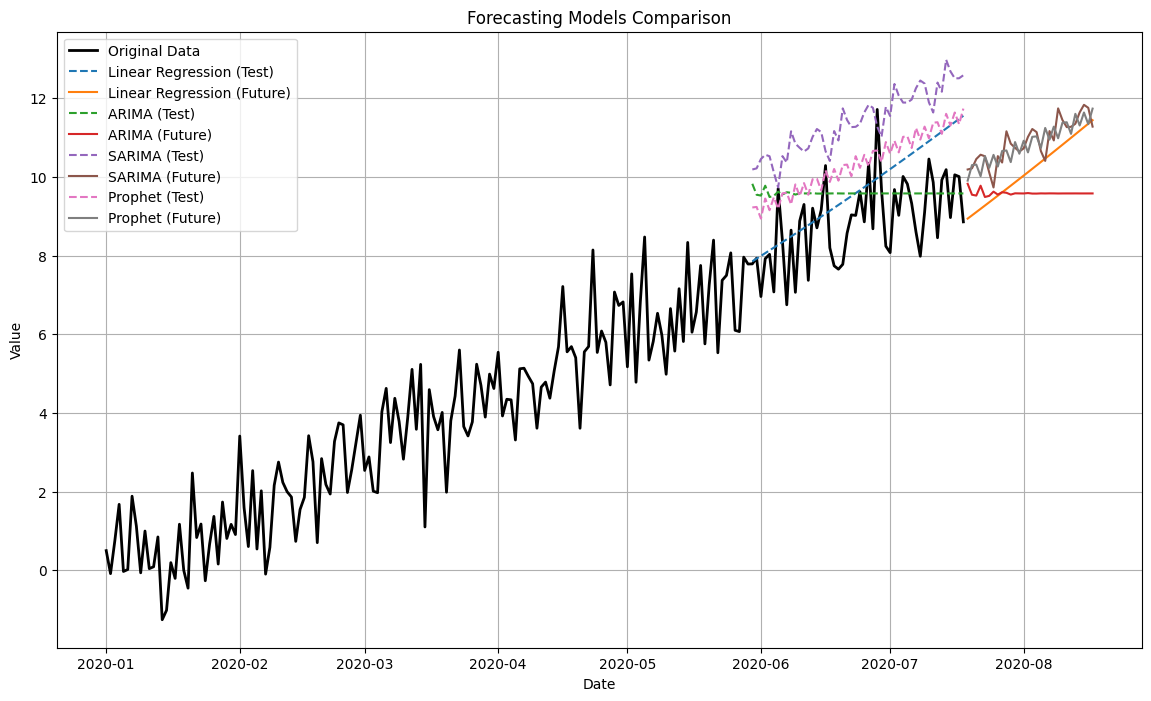

Evaluating seasonal data...


21:32:16 - cmdstanpy - INFO - Chain [1] start processing
21:32:16 - cmdstanpy - INFO - Chain [1] done processing


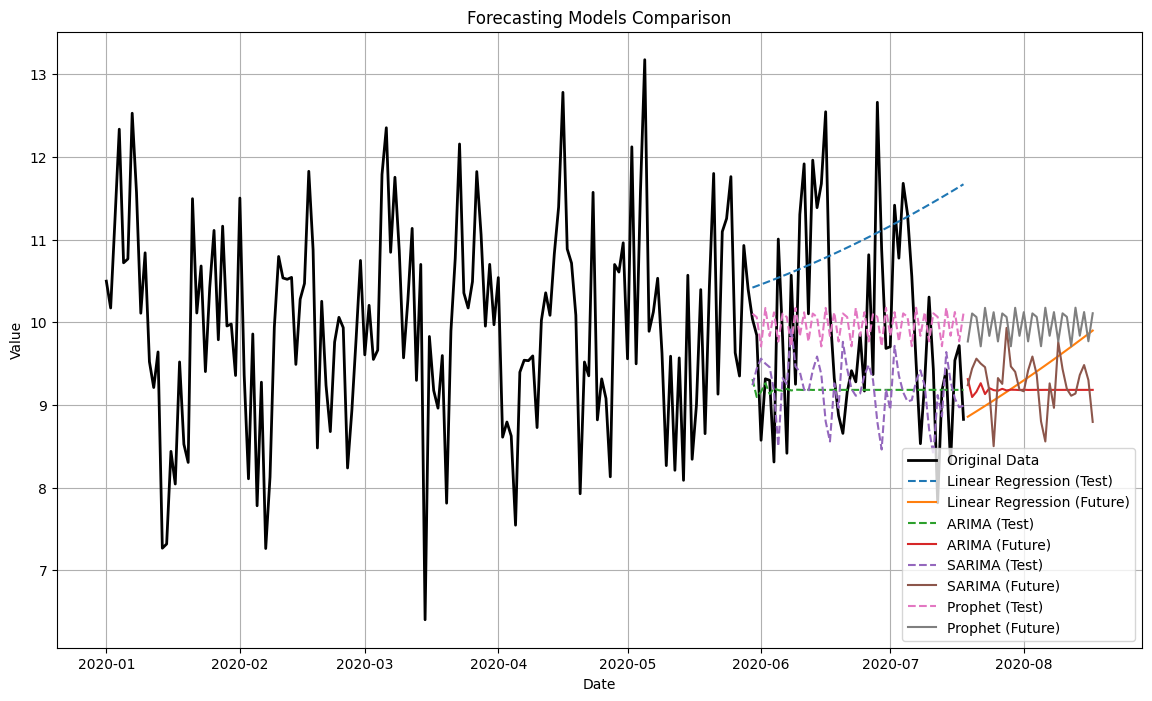

Evaluating white_noise data...


21:32:17 - cmdstanpy - INFO - Chain [1] start processing
21:32:17 - cmdstanpy - INFO - Chain [1] done processing


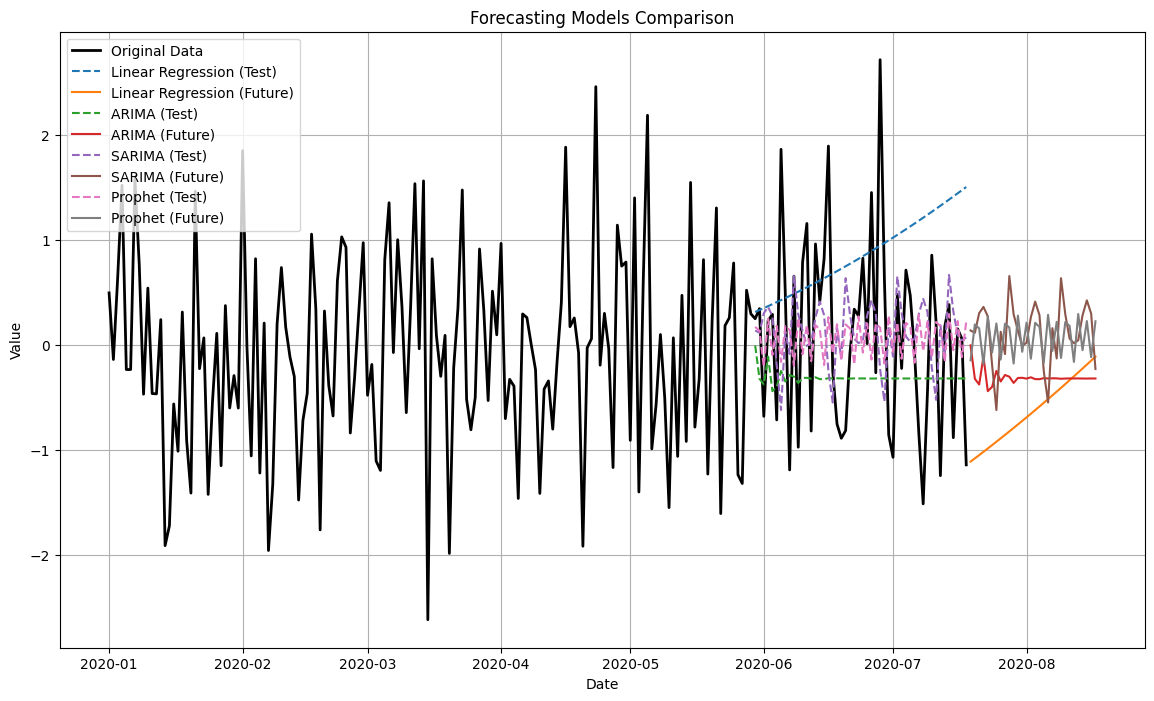

Results:

Data Type: random_walk
Linear Regression - MAE: 4.1552, RMSE: 4.8321
ARIMA - MAE: 2.2596, RMSE: 2.6426
SARIMA - MAE: 2.9017, RMSE: 3.3138
Prophet - MAE: 2.2414, RMSE: 2.6170

Data Type: trend
Linear Regression - MAE: 1.0599, RMSE: 1.2946
ARIMA - MAE: 1.0358, RMSE: 1.2753
SARIMA - MAE: 2.5625, RMSE: 2.7335
Prophet - MAE: 1.5624, RMSE: 1.7501

Data Type: seasonal
Linear Regression - MAE: 1.4042, RMSE: 1.6355
ARIMA - MAE: 1.0304, RMSE: 1.3916
SARIMA - MAE: 1.0964, RMSE: 1.4551
Prophet - MAE: 1.0076, RMSE: 1.1775

Data Type: white_noise
Linear Regression - MAE: 1.0423, RMSE: 1.2748
ARIMA - MAE: 0.7804, RMSE: 0.9649
SARIMA - MAE: 0.7679, RMSE: 0.9979
Prophet - MAE: 0.7219, RMSE: 0.9153


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from forecasting import LinearRegressionModel, ARIMAModel, SARIMAModel, ProphetModel

# モデルの評価
def evaluate_models(df, future_steps=30):
    models = {
        'Linear Regression': LinearRegressionModel(df, future_steps=future_steps),
        'ARIMA': ARIMAModel(df, future_steps=future_steps),
        'SARIMA': SARIMAModel(df, future_steps=future_steps),
        'Prophet': ProphetModel(df, future_steps=future_steps)
    }
    
    results = {}
    
    plt.figure(figsize=(14, 8))
    plt.plot(df['ds'], df['y'], label='Original Data', color='black', linestyle='-', linewidth=2)
    
    for name, model in models.items():
        y_pred, future_dates, future_preds = model.forecast()
        mae, rmse = model.calculate_errors(df['y'].iloc[-len(model.y_test):], y_pred)
        results[name] = {'MAE': mae, 'RMSE': rmse}
        
        # テストデータの予測結果をプロット
        plt.plot(df['ds'].iloc[-len(model.y_test):], y_pred, label=f'{name} (Test)', linestyle='--')
        
        # 将来の予測結果をプロット
        plt.plot(future_dates, future_preds, label=f'{name} (Future)')
    
    plt.title('Forecasting Models Comparison')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return results

# データセットの生成
def generate_data(type='random_walk', size=200):
    np.random.seed(42)
    date_range = pd.date_range(start='2020-01-01', periods=size, freq='D')
    if type == 'random_walk':
        data = np.random.randn(size)
        data = np.cumsum(data)
    elif type == 'trend':
        data = np.linspace(0, 10, size) + np.random.randn(size)
    elif type == 'seasonal':
        data = 10 + np.sin(np.linspace(0, 3.14*2*10, size)) + np.random.randn(size)
    elif type == 'white_noise':
        data = np.random.randn(size)
    else:
        raise ValueError("Unknown type")
    return pd.DataFrame({'ds': date_range, 'y': data})

# 各データセットに対する評価
data_types = ['random_walk', 'trend', 'seasonal', 'white_noise']
results = {}

for data_type in data_types:
    print(f"Evaluating {data_type} data...")
    df = generate_data(type=data_type)
    result = evaluate_models(df)
    results[data_type] = result

print("Results:")
for data_type, result in results.items():
    print(f"\nData Type: {data_type}")
    for model, metrics in result.items():
        print(f"{model} - MAE: {metrics['MAE']:.4f}, RMSE: {metrics['RMSE']:.4f}")


# 各データセットに対する評価
data_types = ['random_walk', 'trend', 'seasonal', 'white_noise']
results = {}

for data_type in data_types:
    print(f"Evaluating {data_type} data...")
    df = generate_data(type=data_type)
    result = evaluate_models(df)
    results[data_type] = result

print("Results:")
for data_type, result in results.items():
    print(f"\nData Type: {data_type}")
    for model, metrics in result.items():
        print(f"{model} - MAE: {metrics['MAE']:.4f}, RMSE: {metrics['RMSE']:.4f}")
